Query: SVM hyperplane

Top 5 most relevant transcript segments:
1. Similarity: 0.5638
Topic: Support Vector Machine
Cluster ID: cluster_13000
Segment: samples from the negative samples but which one is the best SVM can help us choose the best hyperplane which maximizes the margin or sometimes we call it a street around the hyperplane to separate as ...
Video ID: ny1iZ5A8ilA
Image path: clustered_output_v3/Support_Vector_Machine/ny1iZ5A8ilA/clusters/cluster_13000/frame_0037.jpg


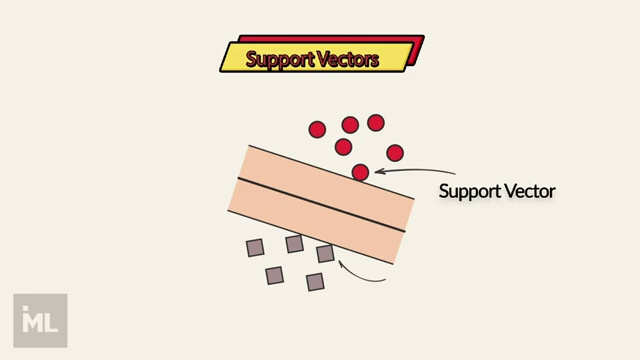


2. Similarity: 0.5404
Topic: Support Vector Machine
Cluster ID: cluster_39000
Segment: actually my hyperplane [NOISE]...
Video ID: lDwow4aOrtg
Image path: clustered_output_v3/Support_Vector_Machine/lDwow4aOrtg/clusters/cluster_39000/frame_1287.jpg


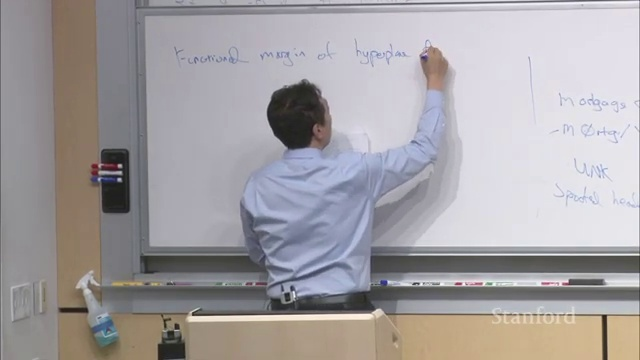


3. Similarity: 0.5113
Topic: Support Vector Machine
Cluster ID: cluster_35000
Segment: support vector classifier is a hyperplane in mathematical jargon a hyperplane is a...
Video ID: efR1C6CvhmE
Image path: clustered_output_v3/Support_Vector_Machine/efR1C6CvhmE/clusters/cluster_35000/frame_0209.jpg


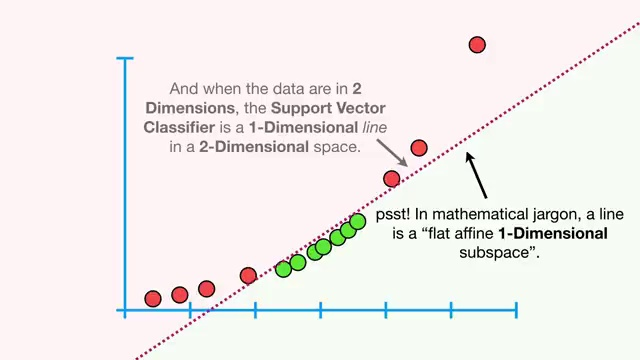


4. Similarity: 0.4960
Topic: Support Vector Machine
Cluster ID: cluster_0
Segment: support vector machine is one of the past and nonlinear supervised - machine learning models given a set of labeled training data SVM will help us to find the optimum hyperplane which categorized new ...
Video ID: ny1iZ5A8ilA
Image path: clustered_output_v3/Support_Vector_Machine/ny1iZ5A8ilA/clusters/cluster_0/frame_0007.jpg


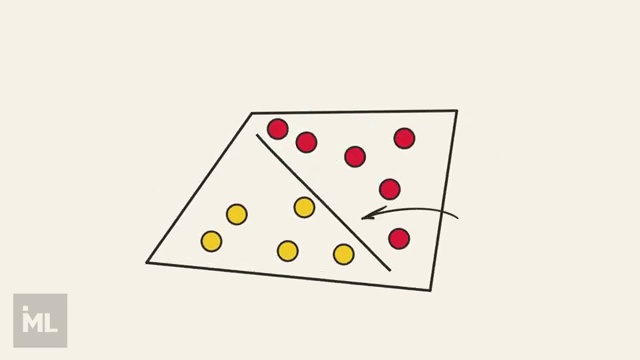


5. Similarity: 0.4593
Topic: Support Vector Machine
Cluster ID: cluster_1000
Segment: we call svm's fit function we don't use x but rather f x where f of x is a non-linear transformation of x geometrically this non-linear transformation might look something like this svm will return a ...
Video ID: Q7vT0--5VII
Image path: clustered_output_v3/Support_Vector_Machine/Q7vT0--5VII/clusters/cluster_1000/frame_0017.jpg


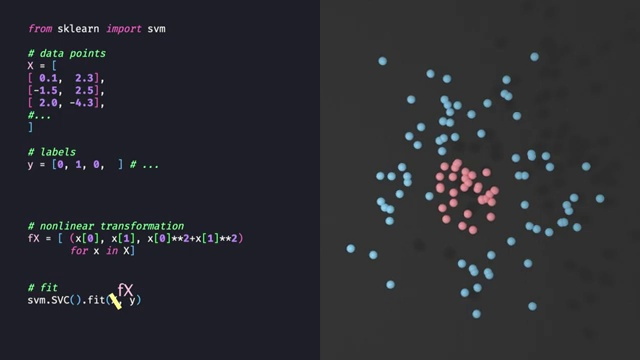

In [7]:
import json
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display

# Load the JSON data
with open('combined_video_data_v16.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Preprocess the transcript segments and collect image frames
segments = []
frames = []
video_ids = []
topics = []
cluster_ids = []
for topic in data:
    for video in topic['videos']:
        for cluster_id, cluster_info in video['cluster_info'].items():
            segments.append(cluster_info['transcript_segment'])
            frames.append(cluster_info['frames'][-1] if cluster_info['frames'] else None)
            video_ids.append(video['video_id'])
            topics.append(topic['topic'])
            cluster_ids.append(cluster_id)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(segments)

# Perform DBSCAN clustering
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
dbscan.fit(tfidf_matrix)

def get_image_path(base_path, cluster_id, frame):
    # Try the original cluster_id first
    path = f"{base_path}/cluster_{cluster_id}/{frame}"
    if os.path.exists(path):
        return path
    
    # If not found, search for the frame in other cluster folders
    for folder in os.listdir(base_path):
        if folder.startswith("cluster_"):
            path = f"{base_path}/{folder}/{frame}"
            if os.path.exists(path):
                return path
    
    return None

def classify_query(query, vectorizer, dbscan, segments, frames, video_ids, topics, cluster_ids):
    query_vec = vectorizer.transform([query])
    
    distances = cosine_similarity(query_vec, tfidf_matrix)
    sorted_indices = np.argsort(distances[0])[::-1]
    
    results = []
    for idx in sorted_indices[:5]:
        segment = segments[idx]
        similarity = distances[0][idx]
        frame = frames[idx]
        video_id = video_ids[idx]
        topic = topics[idx]
        cluster_id = cluster_ids[idx]
        
        # Construct the image path based on the provided structure
        if frame:
            base_path = f"clustered_output_v3/{topic.replace(' ', '_')}/{video_id}/clusters"
            image_path = get_image_path(base_path, cluster_id, frame)
        else:
            image_path = None
        
        results.append({
            "segment": segment,
            "similarity": similarity,
            "image_path": image_path,
            "video_id": video_id,
            "topic": topic,
            "cluster_id": cluster_id
        })
    
    return results

# Example usage
query = "SVM hyperplane"
results = classify_query(query, vectorizer, dbscan, segments, frames, video_ids, topics, cluster_ids)

print(f"Query: {query}\n")
print("Top 5 most relevant transcript segments:")
for i, result in enumerate(results, 1):
    print(f"{i}. Similarity: {result['similarity']:.4f}")
    print(f"Topic: {result['topic']}")
    print(f"Cluster ID: {result['cluster_id']}")
    print(f"Segment: {result['segment'][:200]}...")
    print(f"Video ID: {result['video_id']}")
    if result['image_path']:
        print(f"Image path: {result['image_path']}")
        try:
            display(Image(result['image_path']))
        except FileNotFoundError:
            print("Image file not found.")
        except Exception as e:
            print(f"Error displaying image: {e}")
    print()

Query: SVM kernel trick

Top 5 most relevant transcript segments:
1. Similarity: 0.4199
Topic: Support Vector Machine
Cluster ID: cluster_11000
Segment: detail about kernels although the examples I've given show the data being transformed from a relatively low dimension to a relatively high dimension kernel functions only calculate the relationships b...
Video ID: efR1C6CvhmE
Image path: clustered_output_v3/Support_Vector_Machine/efR1C6CvhmE/clusters/cluster_11000/frame_0386.jpg


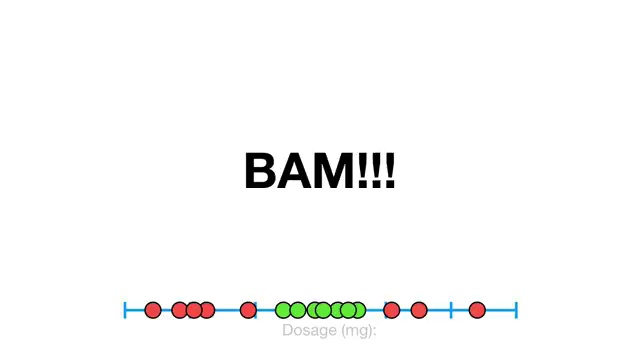


2. Similarity: 0.4066
Topic: Support Vector Machine
Cluster ID: cluster_42000
Segment: is a continuation of svm that we have explored in a previous session let's see what we are having for today kernel function SPM guys I will say kernel function is one of the key important thing that a...
Video ID: 9uD4aG5vSWE
Image path: clustered_output_v3/Support_Vector_Machine/9uD4aG5vSWE/clusters/cluster_42000/frame_0026.jpg


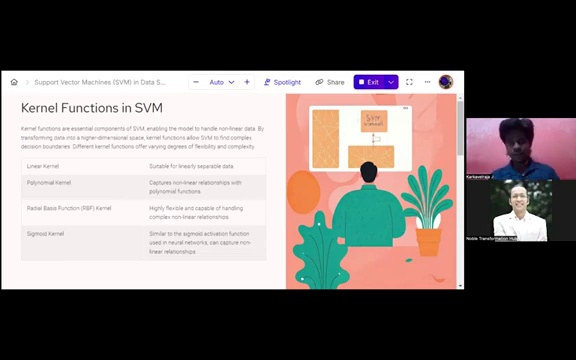


3. Similarity: 0.3709
Topic: Support Vector Machine
Cluster ID: cluster_24000
Segment: X sub J in the Lagrangian this is a small but powerful trick for these problems we could try to the kernel as X 1 sub I square plus X 2 sub I squared if we plot these samples in the new space a clear ...
Video ID: ny1iZ5A8ilA
Image path: clustered_output_v3/Support_Vector_Machine/ny1iZ5A8ilA/clusters/cluster_24000/frame_0281.jpg


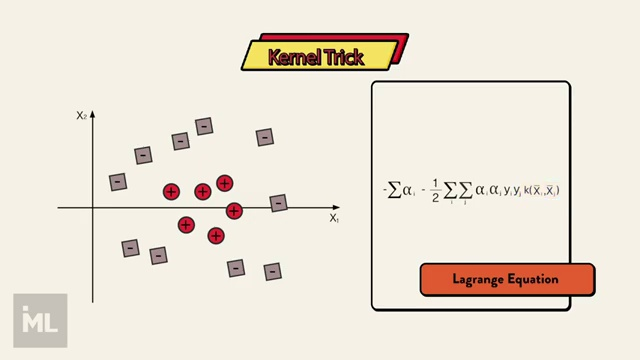


4. Similarity: 0.3554
Topic: Support Vector Machine
Cluster ID: cluster_44000
Segment: with this limitation using soft margin SVM basically the trick is very simple let's add a slack variable Zeta to the...
Video ID: ny1iZ5A8ilA
Image path: clustered_output_v3/Support_Vector_Machine/ny1iZ5A8ilA/clusters/cluster_44000/frame_0213.jpg


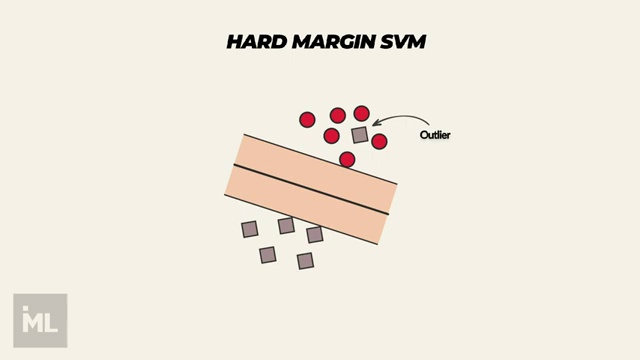


5. Similarity: 0.3422
Topic: Support Vector Machine
Cluster ID: cluster_8001
Segment: svm video but this is the more common case you're going to use in the real world a soft margin svm so hopefully that helped you understand svm in a nutshell again we haven't looked at a single piece o...
Video ID: iEQ0e-WLgkQ
Image path: clustered_output_v3/Support_Vector_Machine/iEQ0e-WLgkQ/clusters/cluster_8001/frame_0153.jpg


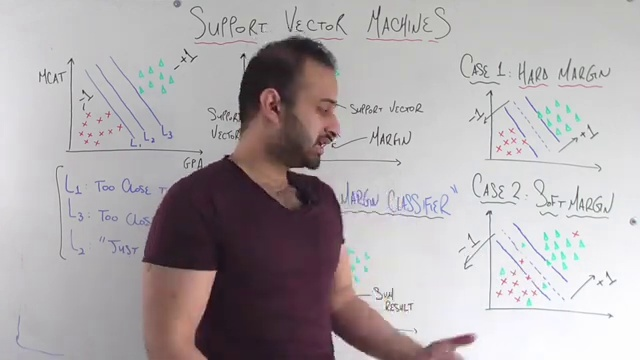

In [11]:
# Example usage
query = "SVM kernel trick"
results = classify_query(query, vectorizer, dbscan, segments, frames, video_ids, topics, cluster_ids)

print(f"Query: {query}\n")
print("Top 5 most relevant transcript segments:")
for i, result in enumerate(results, 1):
    print(f"{i}. Similarity: {result['similarity']:.4f}")
    print(f"Topic: {result['topic']}")
    print(f"Cluster ID: {result['cluster_id']}")
    print(f"Segment: {result['segment'][:200]}...")
    print(f"Video ID: {result['video_id']}")
    if result['image_path']:
        print(f"Image path: {result['image_path']}")
        try:
            display(Image(result['image_path']))
        except FileNotFoundError:
            print("Image file not found.")
        except Exception as e:
            print(f"Error displaying image: {e}")
    print()

Query: DBSCAN epsilon parameter

Top 5 most relevant transcript segments:
1. Similarity: 0.3463
Topic: DBSCAN
Cluster ID: cluster_3000
Segment: DB scan is a clustering technique which can cluster any shape it is a widely used algorithm and only relies on two parameters epsilon and minimum points epsilon is a distance parameter you can...
Video ID: _A9Tq6mGtLI
Image path: clustered_output_v3/DBSCAN/_A9Tq6mGtLI/clusters/cluster_3000/frame_0003.jpg


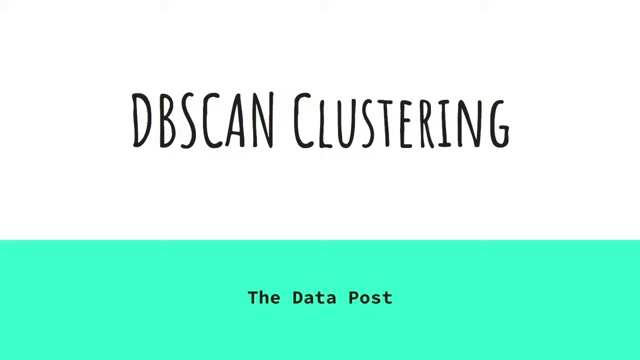


2. Similarity: 0.3011
Topic: DBSCAN
Cluster ID: cluster_6000
Segment: and outliers tend to be in low density regions so let's see how dbscan uses the densities of the points to identify these two clusters bam...
Video ID: RDZUdRSDOok
Image path: clustered_output_v3/DBSCAN/RDZUdRSDOok/clusters/cluster_6000/frame_0059.jpg


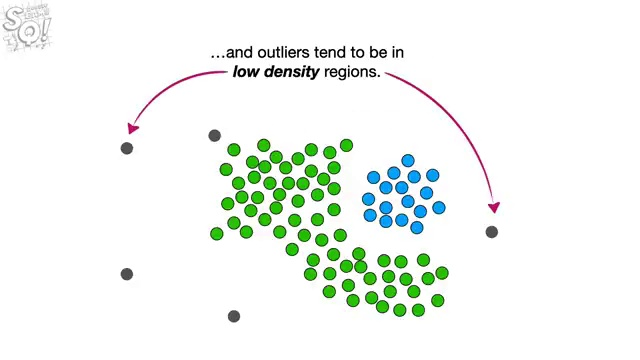


3. Similarity: 0.2764
Topic: Linear Regression
Cluster ID: cluster_28000
Segment: this equation just has one parameter thus p mean equals one both equations have a parameter for the y-intercept however the fit line has one extra parameter the slope in our example this slope is the ...
Video ID: 7ArmBVF2dCs
Image path: clustered_output_v3/Linear_Regression/7ArmBVF2dCs/clusters/cluster_28000/frame_0425.jpg


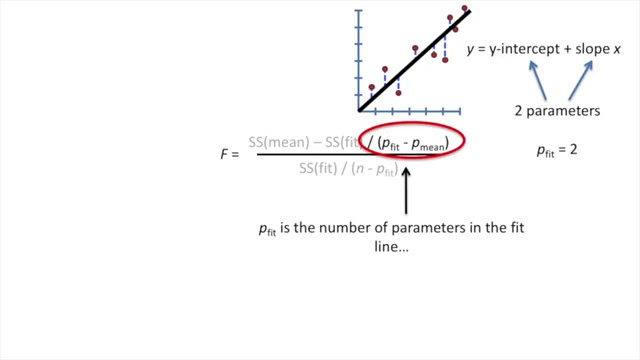


4. Similarity: 0.2746
Topic: DBSCAN
Cluster ID: cluster_2000
Segment: actually trying to find these correct values well there's a way of optimizing and fitting that which I'll show you in the coding video if you want to see that uh but for now we're just going to assume...
Video ID: Lh2pAkNNX1g
Image path: clustered_output_v3/DBSCAN/Lh2pAkNNX1g/clusters/cluster_2000/frame_0072.jpg


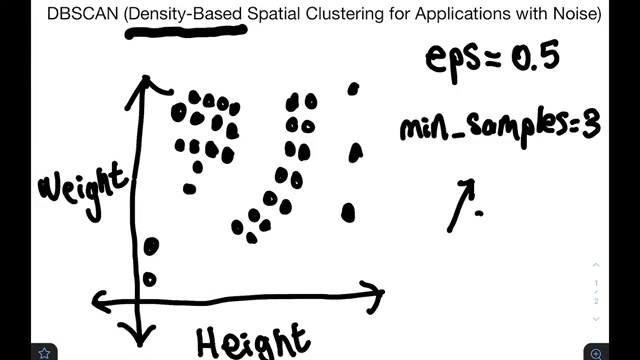


5. Similarity: 0.2735
Topic: Linear Regression
Cluster ID: cluster_37001
Segment: um, let's say you run stochastic gradient descent, right, and, you know, you end up with this parameter and that's the parameter you use,...
Video ID: 4b4MUYve_U8
Image path: clustered_output_v3/Linear_Regression/4b4MUYve_U8/clusters/cluster_37001/frame_0991.jpg


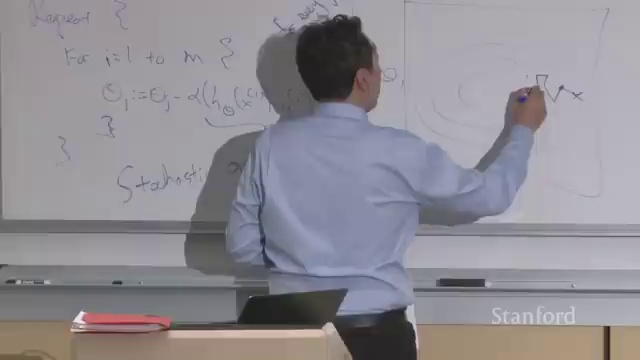

In [12]:
# Example usage
query = "DBSCAN epsilon parameter"
results = classify_query(query, vectorizer, dbscan, segments, frames, video_ids, topics, cluster_ids)

print(f"Query: {query}\n")
print("Top 5 most relevant transcript segments:")
for i, result in enumerate(results, 1):
    print(f"{i}. Similarity: {result['similarity']:.4f}")
    print(f"Topic: {result['topic']}")
    print(f"Cluster ID: {result['cluster_id']}")
    print(f"Segment: {result['segment'][:200]}...")
    print(f"Video ID: {result['video_id']}")
    if result['image_path']:
        print(f"Image path: {result['image_path']}")
        try:
            display(Image(result['image_path']))
        except FileNotFoundError:
            print("Image file not found.")
        except Exception as e:
            print(f"Error displaying image: {e}")
    print()

Query: K-Means elbow method

Top 5 most relevant transcript segments:
1. Similarity: 0.7251
Topic: K-Means Clustering
Cluster ID: cluster_25000
Segment: our elbow plot remember elbow plot elbow all right where is my elbow where is my elbow okay here is my elbow you can see that k is equal to 3 for my elbow and that's what happened...
Video ID: EItlUEPCIzM
Image path: clustered_output_v3/K-Means_Clustering/EItlUEPCIzM/clusters/cluster_25000/frame_0480.jpg


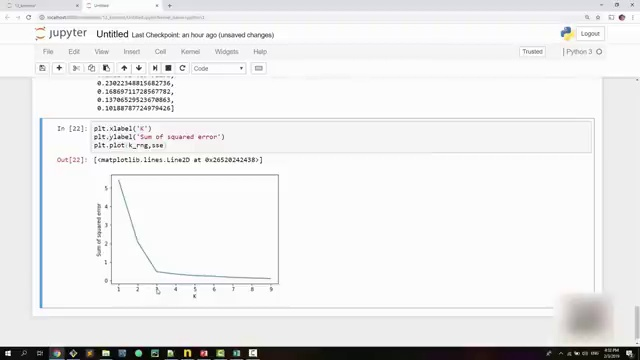


2. Similarity: 0.5410
Topic: Hierarchical Clustering
Cluster ID: cluster_23000
Segment: many clusters to pick and for this we have a few methods but I'm gonna show you what's called the elbow method so the elbow method basically says try a bunch of numbers and then be a little smart on h...
Video ID: QXOkPvFM6NU
Image path: clustered_output_v3/Hierarchical_Clustering/QXOkPvFM6NU/clusters/cluster_23000/frame_0158.jpg


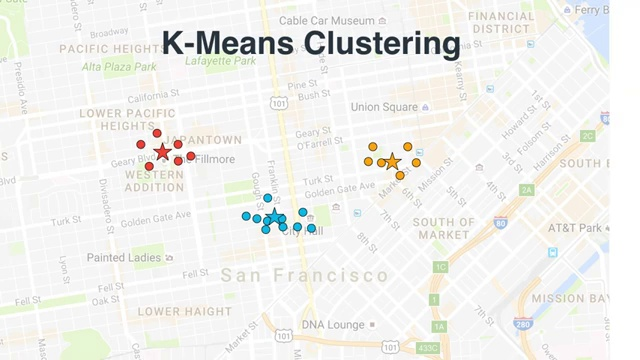


3. Similarity: 0.4838
Topic: Hierarchical Clustering
Cluster ID: cluster_6000
Segment: tree plot we see the first cluster the second the third and the fourth cluster if you don't know what the elbow method...
Video ID: 8QCBl-xdeZI
Image path: clustered_output_v3/Hierarchical_Clustering/8QCBl-xdeZI/clusters/cluster_6000/frame_0163.jpg


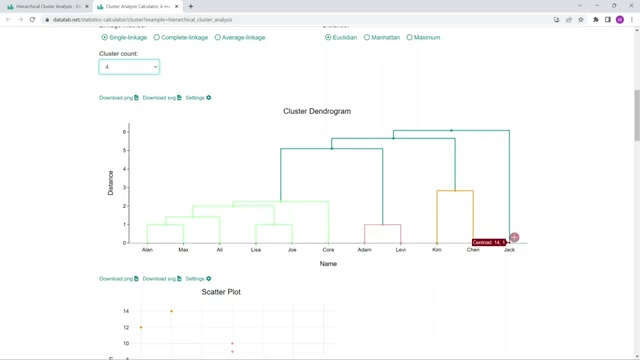


4. Similarity: 0.4401
Topic: K-Means Clustering
Cluster ID: cluster_55000
Segment: centers of my clusters all right let's look into now elbow plot method see this data sort was simple but when you're trying to solve a real life problem you will come across data set which will have l...
Video ID: EItlUEPCIzM
Image path: clustered_output_v3/K-Means_Clustering/EItlUEPCIzM/clusters/cluster_55000/frame_0423.jpg


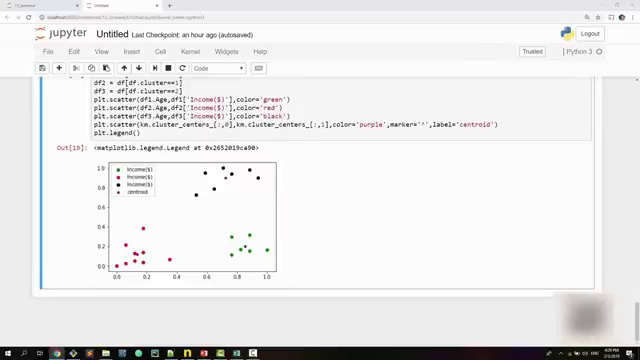


5. Similarity: 0.3883
Topic: K-Means Clustering
Cluster ID: cluster_17000
Segment: this point is short of like an elbow okay so here is a good cluster number okay so for example for whatever the data set this chart is representing uh a good k number would be four all right so that w...
Video ID: EItlUEPCIzM
Image path: clustered_output_v3/K-Means_Clustering/EItlUEPCIzM/clusters/cluster_17000/frame_0150.jpg


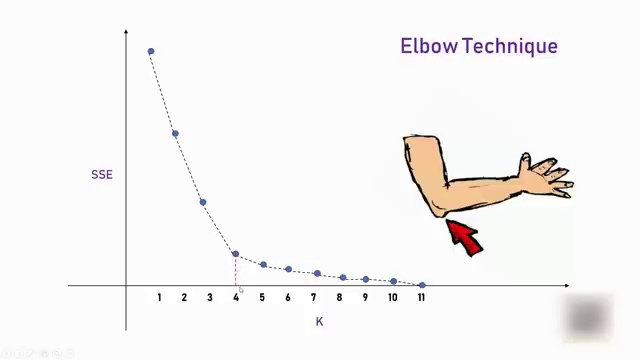

In [13]:
# Example usage
query = "K-Means elbow method"
results = classify_query(query, vectorizer, dbscan, segments, frames, video_ids, topics, cluster_ids)

print(f"Query: {query}\n")
print("Top 5 most relevant transcript segments:")
for i, result in enumerate(results, 1):
    print(f"{i}. Similarity: {result['similarity']:.4f}")
    print(f"Topic: {result['topic']}")
    print(f"Cluster ID: {result['cluster_id']}")
    print(f"Segment: {result['segment'][:200]}...")
    print(f"Video ID: {result['video_id']}")
    if result['image_path']:
        print(f"Image path: {result['image_path']}")
        try:
            display(Image(result['image_path']))
        except FileNotFoundError:
            print("Image file not found.")
        except Exception as e:
            print(f"Error displaying image: {e}")
    print()

Query: CNN activation function

Top 5 most relevant transcript segments:
1. Similarity: 0.4382
Topic: Convolutional Neural Network
Cluster ID: cluster_28000
Segment: however no matter how fancy the convolutional neural network is it's still based on filters aka convolution applying an activation function to the filter output and pooling the output of the activatio...
Video ID: HGwBXDKFk9I
Image path: clustered_output_v3/Convolutional_Neural_Network/HGwBXDKFk9I/clusters/cluster_28000/frame_0286.jpg


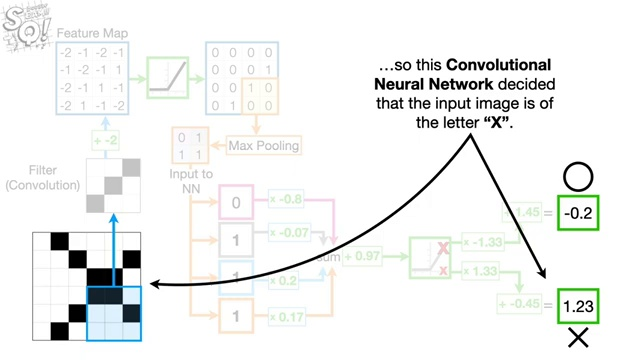


2. Similarity: 0.3349
Topic: Convolutional Neural Network
Cluster ID: cluster_161000
Segment: this second green activation
map also of the same size. And we can do this for as many filters as we want to have in this layer. So for example, if we have six filters, six of these five by five filte...
Video ID: bNb2fEVKeEo
Image path: clustered_output_v3/Convolutional_Neural_Network/bNb2fEVKeEo/clusters/cluster_161000/frame_0467.jpg


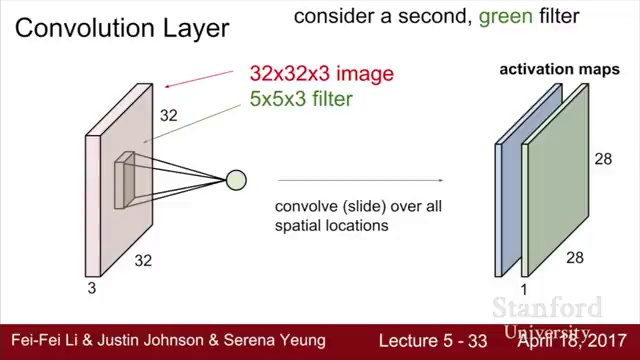


3. Similarity: 0.3338
Topic: Convolutional Neural Network
Cluster ID: cluster_19000
Segment: the main ideas behind the relu activation function and you should know about neural networks with multiple inputs and...
Video ID: HGwBXDKFk9I
Image path: clustered_output_v3/Convolutional_Neural_Network/HGwBXDKFk9I/clusters/cluster_19000/frame_0013.jpg


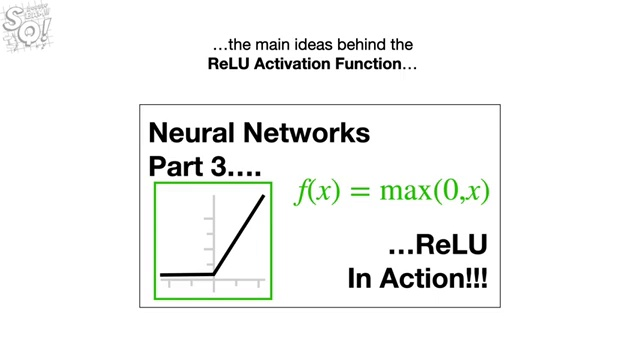


4. Similarity: 0.3039
Topic: Convolutional Neural Network
Cluster ID: cluster_132000
Segment: white box into this CNN and I'll ask it you know is there anything there and is there if there is something there tell me what it is if the CNN detects something I will save the box and return it as p...
Video ID: 2xqkSUhmmXU
Image path: clustered_output_v3/Convolutional_Neural_Network/2xqkSUhmmXU/clusters/cluster_132000/frame_0987.jpg


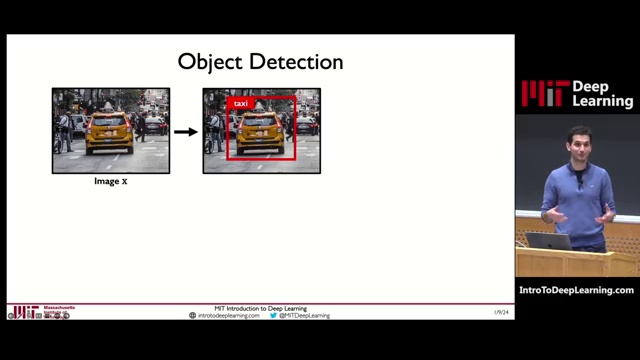


5. Similarity: 0.3024
Topic: Convolutional Neural Network
Cluster ID: cluster_16000
Segment: map through a relu activation function then we select the maximum value in each area and end up with these values in the input nodes now we multiply the values in the input nodes by their associated w...
Video ID: HGwBXDKFk9I
Image path: clustered_output_v3/Convolutional_Neural_Network/HGwBXDKFk9I/clusters/cluster_16000/frame_0220.jpg


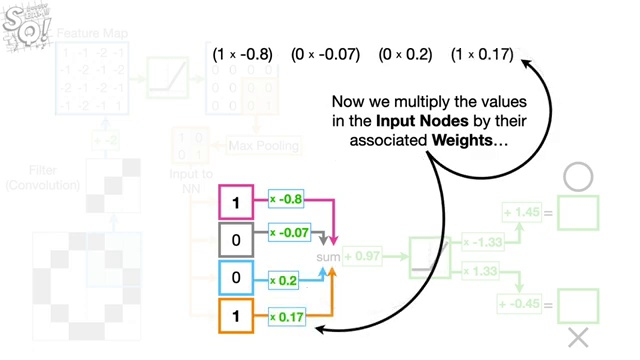

In [8]:
# Example usage
query = "CNN activation function"
results = classify_query(query, vectorizer, dbscan, segments, frames, video_ids, topics, cluster_ids)

print(f"Query: {query}\n")
print("Top 5 most relevant transcript segments:")
for i, result in enumerate(results, 1):
    print(f"{i}. Similarity: {result['similarity']:.4f}")
    print(f"Topic: {result['topic']}")
    print(f"Cluster ID: {result['cluster_id']}")
    print(f"Segment: {result['segment'][:200]}...")
    print(f"Video ID: {result['video_id']}")
    if result['image_path']:
        print(f"Image path: {result['image_path']}")
        try:
            display(Image(result['image_path']))
        except FileNotFoundError:
            print("Image file not found.")
        except Exception as e:
            print(f"Error displaying image: {e}")
    print()